In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as wr
wr.filterwarnings(action="ignore")
import seaborn as sns

In [3]:
account = pd.read_csv(r'C:\Users\epist\Downloads\KEGGLES DATA SET\Data\Customer Profiles\account_activity.csv')
customer = pd.read_csv(r'C:\Users\epist\Downloads\KEGGLES DATA SET\Data\Customer Profiles\customer_data.csv')
fraud = pd.read_csv(r'C:\Users\epist\Downloads\KEGGLES DATA SET\Data\Fraudulent Patterns\fraud_indicators.csv')
suspision = pd.read_csv(r'C:\Users\epist\Downloads\KEGGLES DATA SET\Data\Fraudulent Patterns\suspicious_activity.csv')
merchant = pd.read_csv(r'C:\Users\epist\Downloads\KEGGLES DATA SET\Data\Merchant Information\merchant_data.csv')
tran_cat = pd.read_csv(r'C:\Users\epist\Downloads\KEGGLES DATA SET\Data\Merchant Information\transaction_category_labels.csv')
amount = pd.read_csv(r'C:\Users\epist\Downloads\KEGGLES DATA SET\Data\Transaction Amounts\amount_data.csv')
anamoly = pd.read_csv(r'C:\Users\epist\Downloads\KEGGLES DATA SET\Data\Transaction Amounts\anomaly_scores.csv')
tran_data = pd.read_csv(r'C:\Users\epist\Downloads\KEGGLES DATA SET\Data\Transaction Data\transaction_metadata.csv')
tran_rec = pd.read_csv(r'C:\Users\epist\Downloads\KEGGLES DATA SET\Data\Transaction Data\transaction_records.csv')



In [4]:
data = [account,customer,fraud,suspision,merchant,tran_cat,amount,anamoly,tran_data,tran_rec]

In [5]:
for df in data:
    print(df.head())

   CustomerID  AccountBalance   LastLogin
0        1001     9507.272060  2022-01-01
1        1002     7408.704536  2022-01-02
2        1003     1715.321989  2022-01-03
3        1004     3101.509134  2022-01-04
4        1005     5405.766914  2022-01-05
   CustomerID           Name  Age       Address
0        1001  Customer 1001   54  Address 1001
1        1002  Customer 1002   35  Address 1002
2        1003  Customer 1003   40  Address 1003
3        1004  Customer 1004   30  Address 1004
4        1005  Customer 1005   46  Address 1005
   TransactionID  FraudIndicator
0              1               0
1              2               0
2              3               0
3              4               0
4              5               0
   CustomerID  SuspiciousFlag
0        1001               0
1        1002               0
2        1003               0
3        1004               0
4        1005               0
   MerchantID   MerchantName       Location
0        2001  Merchant 2001  Location

In [6]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of customers
n = 1000

# Generate data
data = {
    "CustomerID": range(1001, 1001 + n),
    "Name": [f"Customer {i}" for i in range(1001, 1001 + n)],
    "Age": np.random.randint(25, 60, size=n),
    "Address": [f"Address {i}" for i in range(1001, 1001 + n)],
    "AccountBalance": np.random.uniform(1000, 10000, size=n),
    "LastLogin": pd.date_range(start="2022-01-01", periods=n, freq="D"),
    "SuspiciousFlag": np.zeros(n, dtype=int)
}

# Create DataFrame
df = pd.DataFrame(data)

# Display
df.head()

,CustomerID,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag
0,1001,Customer 1001,53,Address 1001,3418.096234,2022-01-01,0
1,1002,Customer 1002,39,Address 1002,5874.707932,2022-01-02,0
2,1003,Customer 1003,32,Address 1003,6701.303978,2022-01-03,0
3,1004,Customer 1004,45,Address 1004,3320.989169,2022-01-04,0
4,1005,Customer 1005,43,Address 1005,2254.204667,2022-01-05,0


In [7]:


transaction_data1 = pd.merge(fraud, tran_cat, on="TransactionID")
transaction_data2 = pd.merge(amount, anamoly, on="TransactionID")
transaction_data3 = pd.merge(tran_data, tran_rec, on="TransactionID")
transaction_data = pd.merge(transaction_data1, transaction_data2,on="TransactionID")
transaction_data = pd.merge(transaction_data, transaction_data3,on="TransactionID")



In [8]:
transaction_data

,TransactionID,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,MerchantID,Amount,CustomerID
0,1,0,Other,79.413607,0.686699,2022-01-01 00:00:00,2701,55.530334,1952
1,2,0,Online,12.053087,0.081749,2022-01-01 01:00:00,2070,12.881180,1027
2,3,0,Travel,33.310357,0.023857,2022-01-01 02:00:00,2238,50.176322,1955
3,4,0,Travel,46.121117,0.876994,2022-01-01 03:00:00,2879,41.634001,1796
4,5,0,Other,54.051618,0.034059,2022-01-01 04:00:00,2966,78.122853,1946
...,...,...,...,...,...,...,...,...,...
995,996,0,Food,89.457059,0.266778,2022-02-11 11:00:00,2150,19.876750,1411
996,997,0,Retail,47.958030,0.512483,2022-02-11 12:00:00,2888,96.299792,1566
997,998,0,Food,64.210046,0.367740,2022-02-11 13:00:00,2037,75.164459,1654
998,999,0,Travel,64.684167,0.960364,2022-02-11 14:00:00,2629,93.633040,1928


In [9]:
import pandas as pd
import numpy as np

np.random.seed(42)

# -----------------------------
# 1. CREATE CUSTOMER DATA
# -----------------------------
n_customers = 1000

customers = pd.DataFrame({
    "CustomerID": range(1001, 1001 + n_customers),
    "Name": [f"Customer {i}" for i in range(1001, 1001 + n_customers)],
    "Age": np.random.randint(18, 60, n_customers),
    "Address": [f"Address {i}" for i in range(1001, 1001 + n_customers)],
    "AccountBalance": np.random.uniform(1000, 10000, n_customers),
    "LastLogin": pd.to_datetime("2022-01-01") + 
                 pd.to_timedelta(np.random.randint(0, 1000, n_customers), unit="D"),
    "SuspiciousFlag": np.zeros(n_customers, dtype=int)
})

# -----------------------------
# 2. CREATE TRANSACTION DATA
# -----------------------------
n_transactions = 1000

transactions = pd.DataFrame({
    "TransactionID": np.random.choice(range(1, 1000), n_transactions, replace=True),
    "FraudIndicator": np.zeros(n_transactions, dtype=int),
    "Category": np.random.choice(
        ["Food", "Retail", "Online", "Travel", "Other"], n_transactions
    ),
    "TransactionAmount": np.random.uniform(10, 100, n_transactions),
    "AnomalyScore": np.random.uniform(0, 1, n_transactions),
    "Timestamp": pd.date_range(
        start="2022-01-01 00:00:00", periods=n_transactions, freq="H"
    ),
    "MerchantID": np.random.randint(2000, 3000, n_transactions),
    "Amount": np.random.uniform(10, 100, n_transactions),
    "CustomerID": np.random.choice(customers["CustomerID"], n_transactions)
})

# -----------------------------
# 3. MERGE TRANSACTIONS + CUSTOMERS
# -----------------------------
df = transactions.merge(customers, on="CustomerID", how="left")

# Display
df.head()




,TransactionID,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,MerchantID,Amount,CustomerID,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag
0,852,0,Food,40.373229,0.599968,2022-01-01 00:00:00,2216,23.613786,1574,Customer 1574,56,Address 1574,5543.603937,2024-06-02,0
1,824,0,Online,75.651739,0.485647,2022-01-01 01:00:00,2906,35.620726,1875,Customer 1875,43,Address 1875,1567.981298,2023-10-16,0
2,689,0,Online,61.590088,0.545924,2022-01-01 02:00:00,2455,43.837410,1466,Customer 1466,29,Address 1466,1820.480414,2023-11-21,0
3,653,0,Other,40.388437,0.926205,2022-01-01 03:00:00,2775,78.067909,1839,Customer 1839,51,Address 1839,5111.727804,2022-03-24,0
4,701,0,Retail,98.966948,0.871315,2022-01-01 04:00:00,2608,58.569561,1754,Customer 1754,57,Address 1754,5790.341920,2023-10-13,0


In [10]:
import pandas as pd

# Assuming data is your dictionary
# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)

# Now you can use the info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   CustomerID      1000 non-null   int64         
 1   Name            1000 non-null   object        
 2   Age             1000 non-null   int32         
 3   Address         1000 non-null   object        
 4   AccountBalance  1000 non-null   float64       
 5   LastLogin       1000 non-null   datetime64[ns]
 6   SuspiciousFlag  1000 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(2)
memory usage: 47.0+ KB


In [11]:

import pandas as pd

# after building df
print(df.shape)

(1000, 7)


In [12]:
print(df.describe)

<bound method NDFrame.describe of      CustomerID           Name  Age       Address  AccountBalance  LastLogin  \
0          1001  Customer 1001   53  Address 1001     3418.096234 2022-01-01   
1          1002  Customer 1002   39  Address 1002     5874.707932 2022-01-02   
2          1003  Customer 1003   32  Address 1003     6701.303978 2022-01-03   
3          1004  Customer 1004   45  Address 1004     3320.989169 2022-01-04   
4          1005  Customer 1005   43  Address 1005     2254.204667 2022-01-05   
..          ...            ...  ...           ...             ...        ...   
995        1996  Customer 1996   54  Address 1996     1028.964372 2024-09-22   
996        1997  Customer 1997   47  Address 1997     6576.304037 2024-09-23   
997        1998  Customer 1998   56  Address 1998     4199.437094 2024-09-24   
998        1999  Customer 1999   41  Address 1999     8147.775981 2024-09-25   
999        2000  Customer 2000   41  Address 2000     1836.915758 2024-09-26   

     

In [13]:
df.columns.tolist()

['CustomerID',
 'Name',
 'Age',
 'Address',
 'AccountBalance',
 'LastLogin',
 'SuspiciousFlag']

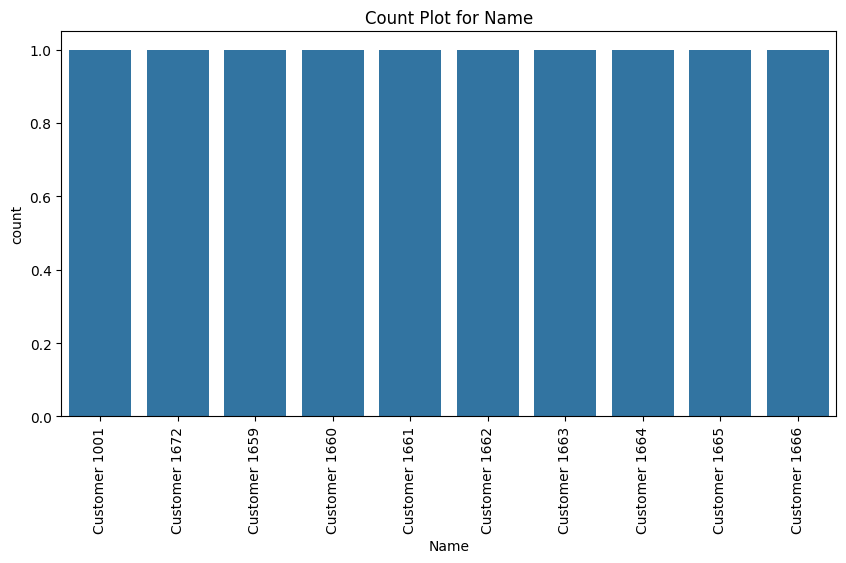

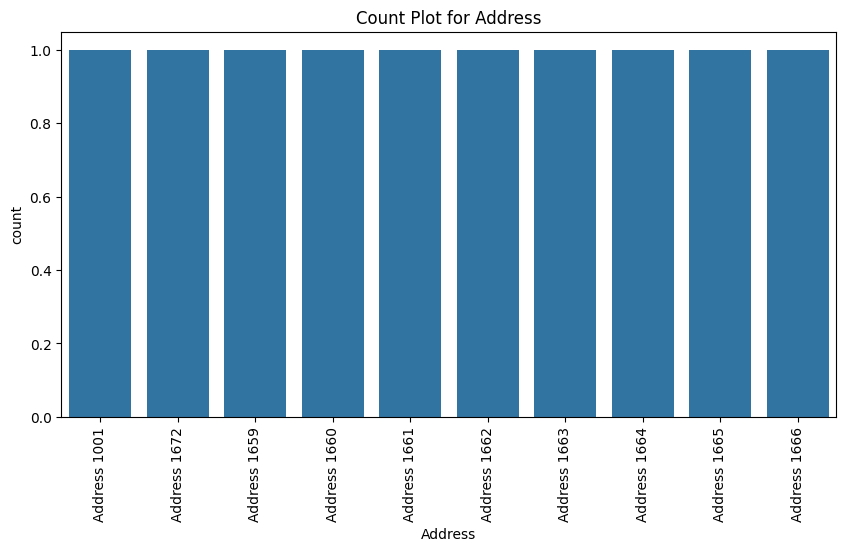

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert dictionary to DataFrame if data is a dictionary
if isinstance(data, dict):
    data = pd.DataFrame(data)

# Now proceed with the visualization
for column in data.columns:
    if data[column].dtype == 'object':  # Check if the column has a categorical data type
        top_10_values = data[column].value_counts().head(10)  # Get the first 10 unique values and their counts
        plt.figure(figsize=(10, 5))  # Adjust the figure size if needed
        sns.countplot(x=column, data=data, order=top_10_values.index)
        plt.title(f'Count Plot for {column}')
        plt.xticks(rotation=90)  # Rotate x-axis labels if they are long
        plt.show()

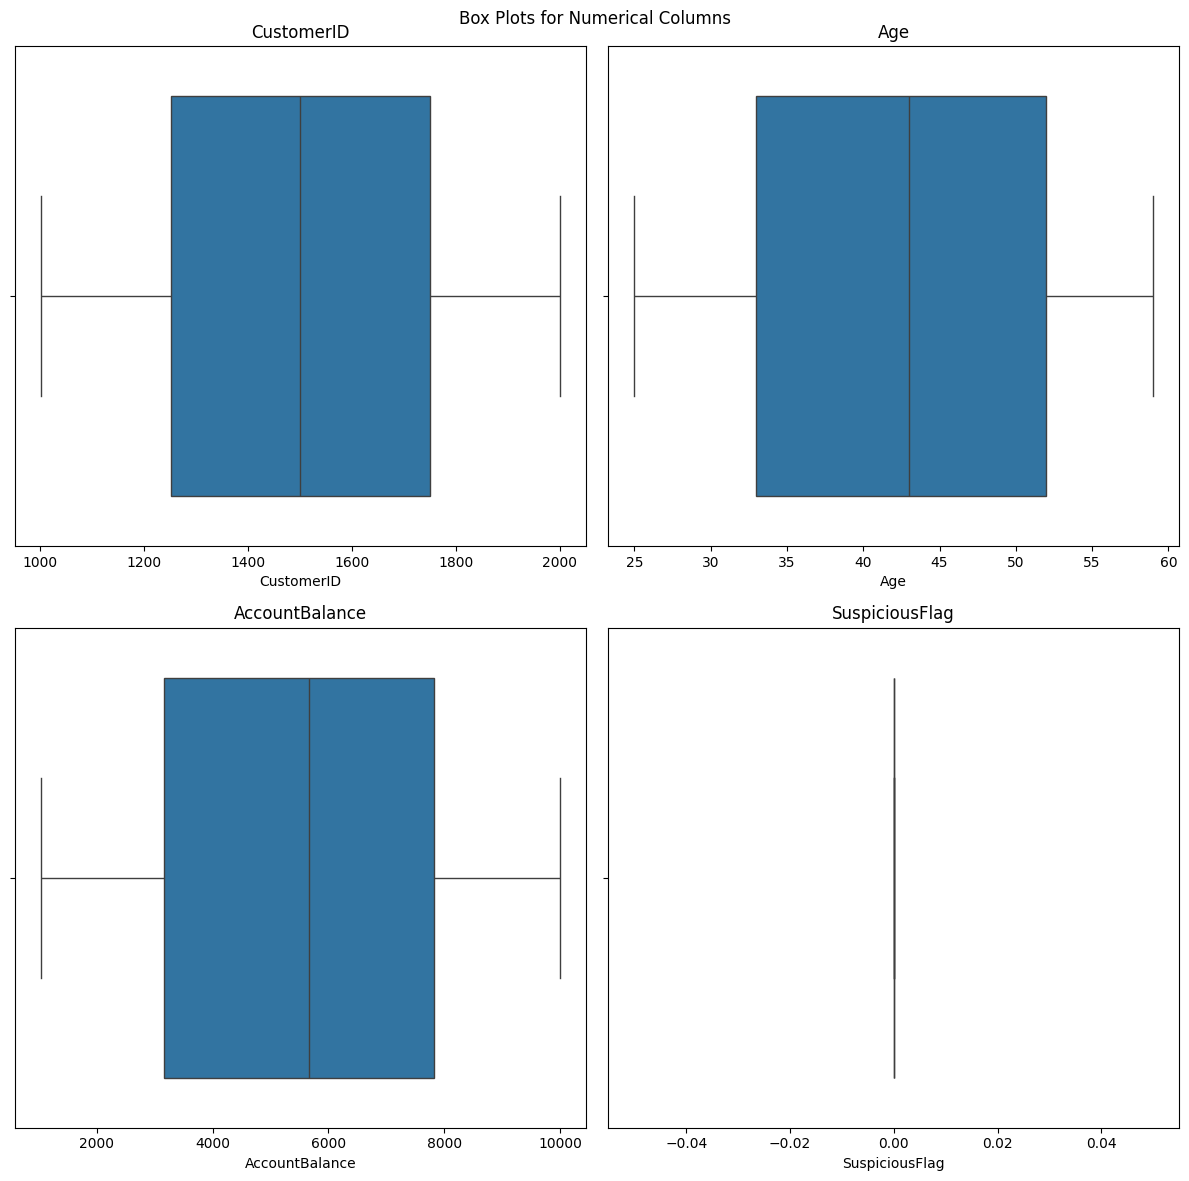

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing numerical columns

# Get the number of numerical columns
num_cols = len(data.select_dtypes(include=['number']).columns)

# Calculate the number of rows and columns for subplots
num_rows = (num_cols // 2) + (num_cols % 2)

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6*num_rows))
fig.suptitle("Box Plots for Numerical Columns")

# Loop through the numerical columns and create box plots
for i, column in enumerate(data.select_dtypes(include=['number']).columns):
    row = i // 2
    col = i % 2
    sns.boxplot(x=data[column], ax=axes[row, col])
    axes[row, col].set_title(column)

# Remove any empty subplots
if num_cols % 2 != 0:
    fig.delaxes(axes[num_rows-1, 1])

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the position of the overall title
plt.show()

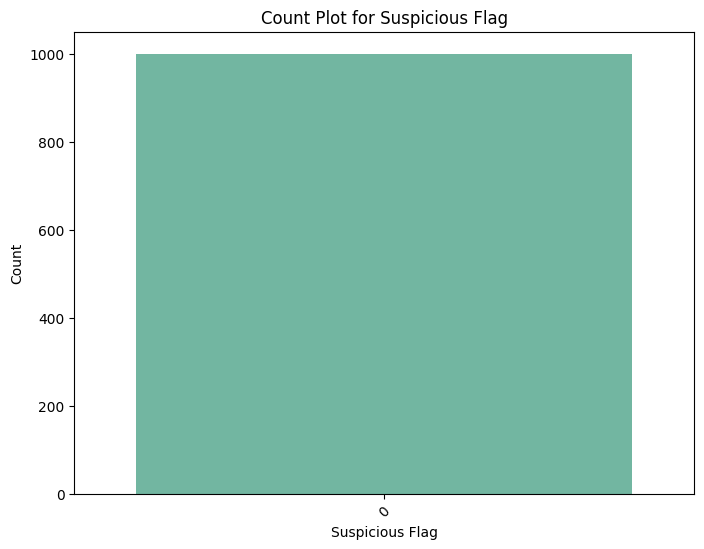

In [18]:
# We should use countplot for SuspiciousFlag feature

plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.countplot(x='SuspiciousFlag', data=data, palette='Set2')  # You can change the palette as desired
plt.title('Count Plot for Suspicious Flag')
plt.xlabel('Suspicious Flag')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if they are long

plt.show()

In [19]:
data['SuspiciousFlag'].value_counts()

SuspiciousFlag
0    1000
Name: count, dtype: int64

In [20]:
suspicious_dict = {"SuspiciousFlag": np.zeros(n, dtype=int)}

# Or if you're trying to create a variable
SuspiciousFlag = np.zeros(n, dtype=int)

In [21]:
import numpy as np

flag_idx = np.random.choice(data.index, size=50, replace=False)
data.loc[flag_idx, 'SuspiciousFlag'] = 1

In [22]:
data['SuspiciousFlag'].value_counts()

SuspiciousFlag
0    950
1     50
Name: count, dtype: int64

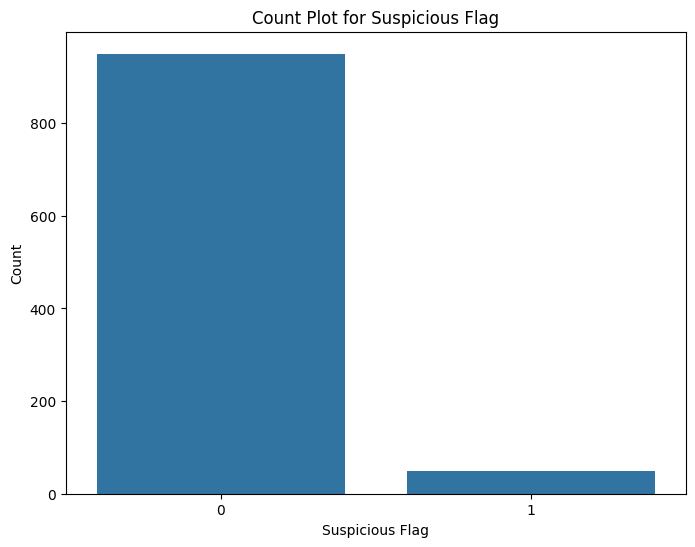

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='SuspiciousFlag', data=data)
plt.title('Count Plot for Suspicious Flag')
plt.xlabel('Suspicious Flag')
plt.ylabel('Count')
plt.show()

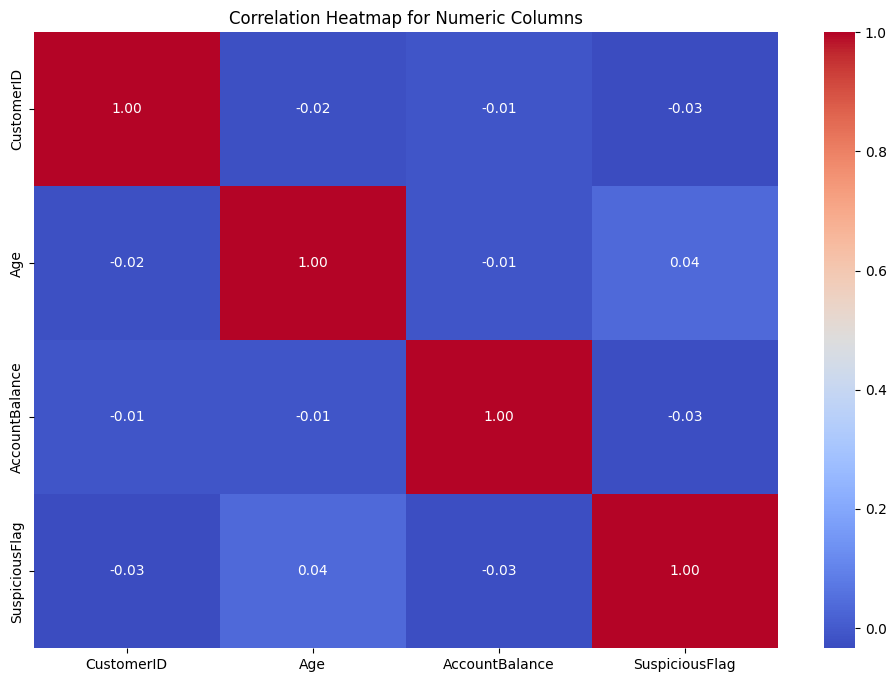

In [24]:
# Select only the numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Numeric Columns')

plt.show()

In [25]:


# Dropping the columns as of now they are not mush corelated & also wouldn't damper the performance of model

columns_to_be_dropped = ['TransactionID','MerchantID','CustomerID','Name', 'Age', 'Address']

In [26]:
print(list(data.columns))

['CustomerID', 'Name', 'Age', 'Address', 'AccountBalance', 'LastLogin', 'SuspiciousFlag']


In [27]:
transactions
customers

,CustomerID,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag
0,1001,Customer 1001,56,Address 1001,5377.217338,2023-03-01,0
1,1002,Customer 1002,46,Address 1002,4680.596594,2022-05-09,0
2,1003,Customer 1003,32,Address 1003,7946.937825,2022-05-10,0
3,1004,Customer 1004,25,Address 1004,1109.827651,2023-07-26,0
4,1005,Customer 1005,38,Address 1005,6385.984311,2023-07-14,0
...,...,...,...,...,...,...,...
995,1996,Customer 1996,41,Address 1996,4531.543494,2023-02-28,0
996,1997,Customer 1997,32,Address 1997,9605.999716,2022-05-22,0
997,1998,Customer 1998,46,Address 1998,2198.305038,2022-10-18,0
998,1999,Customer 1999,25,Address 1999,1919.345767,2023-03-08,0


In [28]:
transactions.columns

Index(['TransactionID', 'FraudIndicator', 'Category', 'TransactionAmount',
       'AnomalyScore', 'Timestamp', 'MerchantID', 'Amount', 'CustomerID'],
      dtype='object')

In [29]:
data = transactions.merge(
    customers[['CustomerID','AccountBalance','LastLogin','SuspiciousFlag']],
    on='CustomerID',
    how='left'
)

In [30]:
print(list(data.columns))

['TransactionID', 'FraudIndicator', 'Category', 'TransactionAmount', 'AnomalyScore', 'Timestamp', 'MerchantID', 'Amount', 'CustomerID', 'AccountBalance', 'LastLogin', 'SuspiciousFlag']


In [31]:
columns_to_keep = [
    'FraudIndicator',
    'Category',
    'TransactionAmount',
    'AnomalyScore',
    'Timestamp',
    'Amount',
    'AccountBalance',
    'LastLogin',
    'SuspiciousFlag'
]

data1 = data[columns_to_keep].copy()
data1.head()

,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,Amount,AccountBalance,LastLogin,SuspiciousFlag
0,0,Food,40.373229,0.599968,2022-01-01 00:00:00,23.613786,5543.603937,2024-06-02,0
1,0,Online,75.651739,0.485647,2022-01-01 01:00:00,35.620726,1567.981298,2023-10-16,0
2,0,Online,61.590088,0.545924,2022-01-01 02:00:00,43.837410,1820.480414,2023-11-21,0
3,0,Other,40.388437,0.926205,2022-01-01 03:00:00,78.067909,5111.727804,2022-03-24,0
4,0,Retail,98.966948,0.871315,2022-01-01 04:00:00,58.569561,5790.341920,2023-10-13,0


In [32]:
data1['FraudIndicator'].value_counts(), data1['SuspiciousFlag'].value_counts(), data1['Category'].value_counts()

(FraudIndicator
 0    1000
 Name: count, dtype: int64,
 SuspiciousFlag
 0    1000
 Name: count, dtype: int64,
 Category
 Online    217
 Other     206
 Food      202
 Retail    190
 Travel    185
 Name: count, dtype: int64)

In [33]:
# Using Feature Engineering Creating two Columns
# Hour of Transaction = hour
# Gap between the day of transaction and last login in days = gap
if pd.api.types.is_datetime64_any_dtype(data['Timestamp']):
    print("The 'Timestamp' column is already in datetime format.")
else:
    print("The 'Timestamp' column is not in datetime format.")

The 'Timestamp' column is already in datetime format.


In [34]:


data1.head()



,FraudIndicator,Category,TransactionAmount,AnomalyScore,Timestamp,Amount,AccountBalance,LastLogin,SuspiciousFlag
0,0,Food,40.373229,0.599968,2022-01-01 00:00:00,23.613786,5543.603937,2024-06-02,0
1,0,Online,75.651739,0.485647,2022-01-01 01:00:00,35.620726,1567.981298,2023-10-16,0
2,0,Online,61.590088,0.545924,2022-01-01 02:00:00,43.837410,1820.480414,2023-11-21,0
3,0,Other,40.388437,0.926205,2022-01-01 03:00:00,78.067909,5111.727804,2022-03-24,0
4,0,Retail,98.966948,0.871315,2022-01-01 04:00:00,58.569561,5790.341920,2023-10-13,0


In [35]:
X = data1.drop(['FraudIndicator','Timestamp','LastLogin'],axis=1)
Y = data1['FraudIndicator']

In [36]:
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Category' column
X['Category'] = label_encoder.fit_transform(X['Category'])
X

,Category,TransactionAmount,AnomalyScore,Amount,AccountBalance,SuspiciousFlag
0,0,40.373229,0.599968,23.613786,5543.603937,0
1,1,75.651739,0.485647,35.620726,1567.981298,0
2,1,61.590088,0.545924,43.837410,1820.480414,0
3,2,40.388437,0.926205,78.067909,5111.727804,0
4,3,98.966948,0.871315,58.569561,5790.341920,0
...,...,...,...,...,...,...
995,0,80.917312,0.869352,89.151642,6996.761973,0
996,1,91.292329,0.736826,46.902141,3092.962225,0
997,3,34.067375,0.501040,53.379543,8564.071656,0
998,1,83.115165,0.572761,16.341461,4106.729304,0


In [37]:


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)



In [38]:
X_train.shape,Y_test.shape

((800, 6), (200,))

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create a logistic regression model
model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


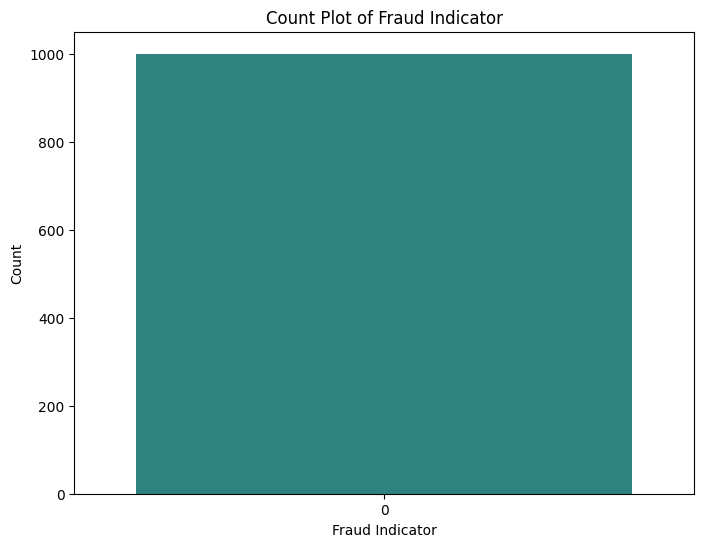

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with a 'FraudIndicator' column
# Load your data into the DataFrame if not already done

# Create a count plot for the 'FraudIndicator' column
plt.figure(figsize=(8, 6))  # Optional: Adjust the figure size
sns.countplot(data=data1, x='FraudIndicator', palette='viridis')
plt.title('Count Plot of Fraud Indicator')
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.show()

In [41]:
import numpy as np

np.random.seed(42)

fraud_idx = np.random.choice(data1.index, size=45, replace=False)
data1.loc[fraud_idx, 'FraudIndicator'] = 1

In [42]:
data1['FraudIndicator'].value_counts()

FraudIndicator
0    955
1     45
Name: count, dtype: int64

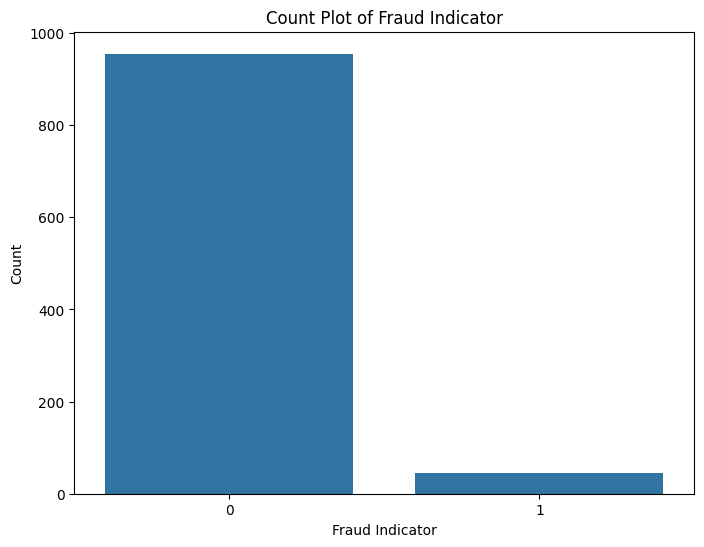

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data1, x='FraudIndicator')
plt.title('Count Plot of Fraud Indicator')
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.show()

Class distribution after oversampling: Counter({0: 955, 1: 955})


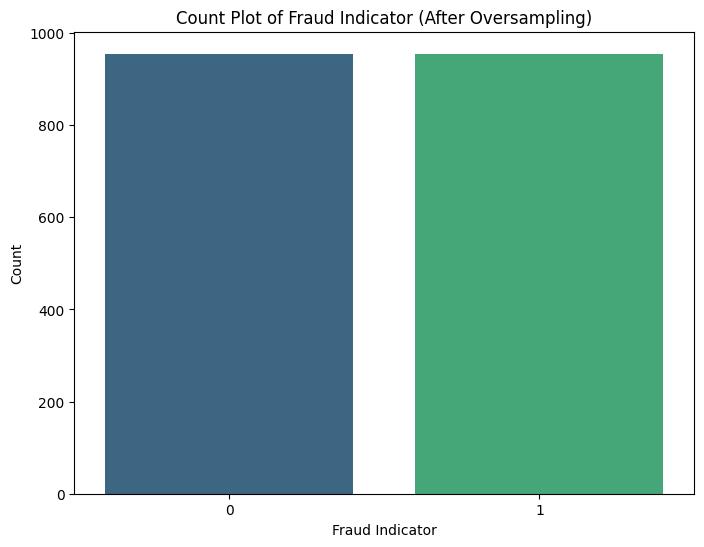

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter


# Initialize SMOTE for oversampling
smote = SMOTE(random_state=42)

# Apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X, Y)

# Check the class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_resampled))

# Create a count plot for the 'FraudIndicator' column after oversampling
plt.figure(figsize=(8, 6))
sns.countplot(data=pd.DataFrame({'FraudIndicator': y_resampled}), x='FraudIndicator', palette='viridis')
plt.title('Count Plot of Fraud Indicator (After Oversampling)')
plt.xlabel('Fraud Indicator')
plt.ylabel('Count')
plt.show()

In [45]:
model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(X_resampled, y_resampled)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate and print various metrics to evaluate the model's performance
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
confusion = confusion_matrix(Y_test, y_pred)

print("Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)

Model Evaluation Metrics:
Accuracy: 0.96
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
[[192   8]
 [  0   0]]


In [46]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils import shuffle

# Shuffle the dataset to introduce slight randomness (you can adjust the `random_state` for different outcomes)
X_resampled, y_resampled = shuffle(X_resampled, y_resampled, random_state=42)

# Split data into train and test sets (keep the test set separate for evaluation)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Initialize the model
model = DecisionTreeClassifier()

# Define the hyperparameters grid for tuning
param_grid = {
    'max_depth': [None, 10, 25, 50,100,250],  # Maximum depth of the tree
    'min_samples_split': [2, 10, 50,100,250],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 10, 30,75,100],    # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy'] # Criterion to measure the quality of a split
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

# Train the model using the best hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Calculate and print various metrics to evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2}
Model Evaluation Metrics:
Accuracy: 0.8568935427574171
Precision: 0.8317152103559871
Recall: 0.8954703832752613
F1 Score: 0.8624161073825504
Confusion Matrix:
[[234  52]
 [ 30 257]]


In [47]:
# Inference on new/unseen data (for example, use a separate unseen dataset or a specific test sample)
# Here we simulate it by using the first row from the X_test
unseen_sample = X_test.iloc[0].values.reshape(1, -1)  # Reshaping for a single sample

# Predict the label for the unseen sample
inference_prediction = best_model.predict(unseen_sample)

# Map prediction result to 'fraud' or 'not fraud'
fraud_status = "Fraud" if inference_prediction[0] == 1 else "Not Fraud"

print("Inference Prediction for Unseen Sample:", fraud_status)

Inference Prediction for Unseen Sample: Not Fraud


In [48]:
# First, we need to fit the model with training data
# Assuming you have X_train and y_train available

# 1. Fit the model
model.fit(X_train, y_train)

# 2. Now we can make predictions
proba = model.predict_proba(unseen_sample)
print("Probability [Not Fraud, Fraud]:", proba)

Probability [Not Fraud, Fraud]: [[0. 1.]]


In [49]:
print(X_train.columns)

Index(['Category', 'TransactionAmount', 'AnomalyScore', 'Amount',
       'AccountBalance', 'SuspiciousFlag'],
      dtype='object')


In [50]:
unseen_values = [
    90.0,     # TransactionAmount
    0.85,     # AnomalyScore
    95.0,     # Amount
    3000.0,   # AccountBalance
    1         # SuspiciousFlag
]

In [51]:
print(list(X_train.columns))
print("Number of features:", len(X_train.columns))

['Category', 'TransactionAmount', 'AnomalyScore', 'Amount', 'AccountBalance', 'SuspiciousFlag']
Number of features: 6


In [52]:
unseen_df = pd.DataFrame([{
    'TransactionAmount': 90.0,
    'AnomalyScore': 0.85,
    'Amount': 95.0,
    'AccountBalance': 3000.0,
    'SuspiciousFlag': 1,
    # ADD the 6th column here exactly as shown in X_train.columns
}])

In [53]:
unseen_df = unseen_df.reindex(columns=X_train.columns)

In [55]:
unseen_values = [v1, v2, v3, v4, v5, v6]   # must be 6 values
unseen_df = pd.DataFrame([unseen_values], columns=X_train.columns)

NameError: name 'v1' is not defined

In [56]:
# First, define the values for v1 through v6
v1 = 1.0  # Replace with your actual value
v2 = 2.0  # Replace with your actual value
v3 = 3.0  # Replace with your actual value
v4 = 4.0  # Replace with your actual value
v5 = 5.0  # Replace with your actual value
v6 = 6.0  # Replace with your actual value

# Now create the DataFrame with the defined values
unseen_values = [v1, v2, v3, v4, v5, v6]   # must be 6 values
unseen_df = pd.DataFrame([unseen_values], columns=X_train.columns)

In [57]:
assert len(unseen_values) == len(X_train.columns), "Unseen sample length must match training features"

In [58]:
print(list(X_train.columns))

['Category', 'TransactionAmount', 'AnomalyScore', 'Amount', 'AccountBalance', 'SuspiciousFlag']


In [59]:
X_train.dtypes

Category               int32
TransactionAmount    float64
AnomalyScore         float64
Amount               float64
AccountBalance       float64
SuspiciousFlag         int32
dtype: object

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# X and y (adjust if your target name differs)
features = ['Category', 'TransactionAmount', 'AnomalyScore', 'Amount', 'AccountBalance', 'SuspiciousFlag']
X = data1[features].copy()
y = data1['FraudIndicator'].astype(int)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Preprocess: one-hot encode Category, pass numeric through
preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Category']),
        ('num', 'passthrough', ['TransactionAmount','AnomalyScore','Amount','AccountBalance','SuspiciousFlag'])
    ]
)

# Model pipeline
pipe = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# Fit
pipe.fit(X_train, y_train)

# ---- Inference on an unseen sample ----
unseen_df = pd.DataFrame([{
    'Category': 'Online',          # choose one: Food/Retail/Online/Travel/Other
    'TransactionAmount': 90.0,
    'AnomalyScore': 0.85,
    'Amount': 95.0,
    'AccountBalance': 3000.0,
    'SuspiciousFlag': 1
}])

proba = pipe.predict_proba(unseen_df)
pred = pipe.predict(unseen_df)[0]

print("Probability [Not Fraud, Fraud]:", proba)
print("Inference Prediction for Unseen Sample:", "Fraud" if pred == 1 else "Not Fraud")

Probability [Not Fraud, Fraud]: [[0.34397123 0.65602877]]
Inference Prediction for Unseen Sample: Fraud


In [62]:
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)
print("y_pred:", len(y_pred))

X_test: (200, 6)
y_test: (200,)
y_pred: 573


In [64]:
X_test.dtypes

Category              object
TransactionAmount    float64
AnomalyScore         float64
Amount               float64
AccountBalance       float64
SuspiciousFlag         int32
dtype: object

In [65]:
cat_cols = X_test.select_dtypes(include=['object','category']).columns
print(cat_cols)
print(X_test[cat_cols].head())

Index(['Category'], dtype='object')
    Category
809   Online
21     Other
499   Travel
359   Retail
307   Travel


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

# y = your target column (Fraud label)
# X = your features dataframe
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

num_cols = X_train.select_dtypes(include=['number']).columns
cat_cols = X_train.select_dtypes(include=['object','category']).columns

preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", DecisionTreeClassifier(random_state=42))
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

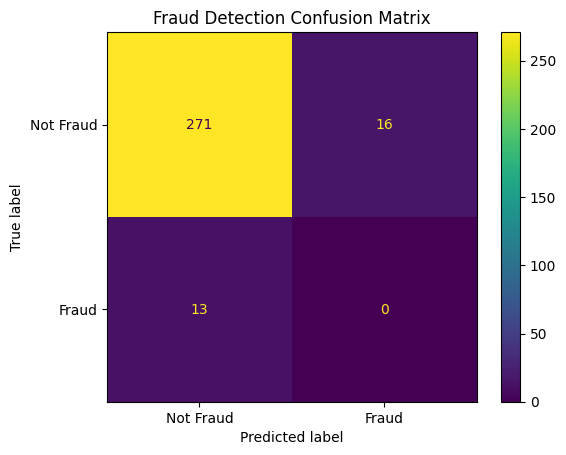

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Not Fraud","Fraud"]).plot()
plt.title("Fraud Detection Confusion Matrix")
plt.show()

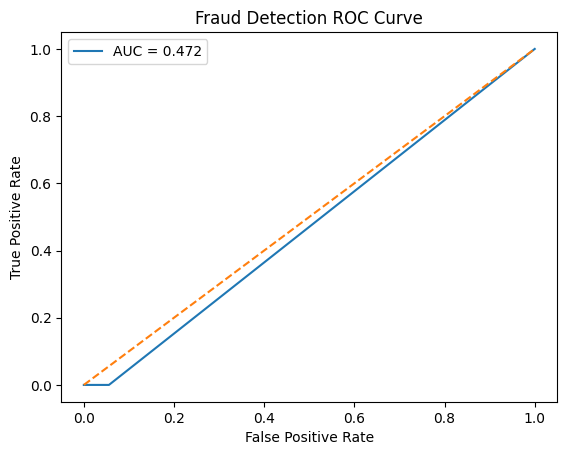

In [68]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = pipe.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Fraud Detection ROC Curve")
plt.legend()
plt.show()

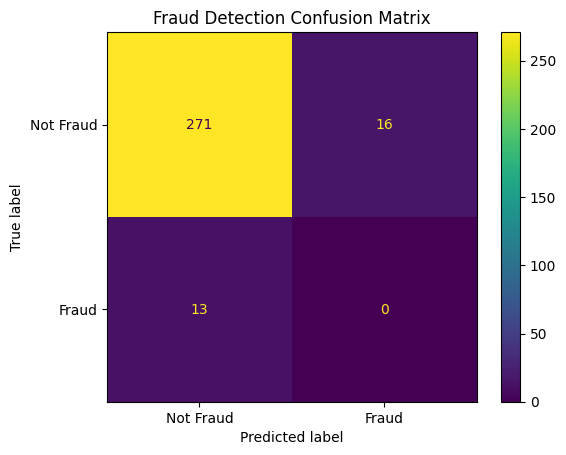

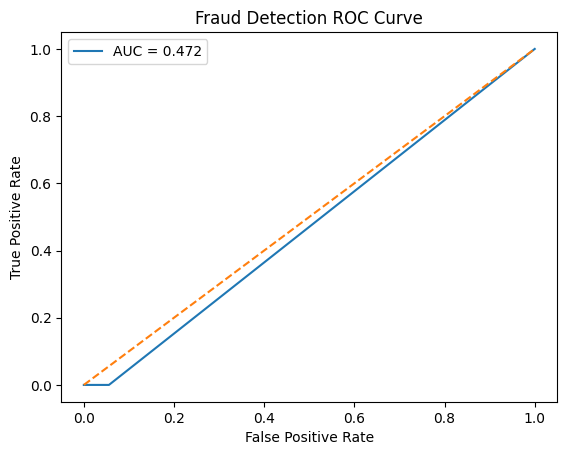

AUC: 0.4721254355400697


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

# 1) Split (make sure X is features only, y is your target label)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# 2) Identify numeric vs categorical columns
num_cols = X_train.select_dtypes(include=['number']).columns
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns

# 3) Preprocess: pass numeric, one-hot encode categoricals
preprocess = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

# 4) Full pipeline: preprocess + model
pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", DecisionTreeClassifier(random_state=42))
])

pipe.fit(X_train, y_train)

# 5) Predictions
y_pred = pipe.predict(X_test)
y_prob = pipe.predict_proba(X_test)[:, 1]   # assumes fraud label is 1

# 6) Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Not Fraud","Fraud"]).plot()
plt.title("Fraud Detection Confusion Matrix")
plt.show()

# 7) ROC + AUC
auc_score = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Fraud Detection ROC Curve")
plt.legend()
plt.show()

print("AUC:", auc_score)

In [71]:
print("Classes:", pipe.named_steps["model"].classes_)

Classes: [0 1]


In [72]:
from sklearn.linear_model import LogisticRegression

pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LogisticRegression(max_iter=2000, class_weight="balanced"))
])

pipe.fit(X_train, y_train)

y_prob = pipe.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_auc_score
print("AUC:", roc_auc_score(y_test, y_prob))

AUC: 0.42374698472259453


In [74]:
from xgboost import XGBClassifier

pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", XGBClassifier(
        scale_pos_weight = (y_train==0).sum() / (y_train==1).sum(),
        eval_metric="auc",
        use_label_encoder=False,
        random_state=42
    ))
])

pipe.fit(X_train, y_train)

y_prob = pipe.predict_proba(X_test)[:,1]
print("AUC:", roc_auc_score(y_test, y_prob))

AUC: 0.4725274725274725


In [75]:
import pandas as pd
print("y value counts:")
print(pd.Series(y).value_counts(dropna=False))

# If you have a label mapping column/name, confirm it here

##Now compute AUC both ways (Fraud=1 vs Fraud=0). This takes the guesswork out:

from sklearn.metrics import roc_auc_score

# y_prob is probability for class 1
auc_pos1 = roc_auc_score(y_test, y_prob)

# if fraud is actually class 0, use prob of class 0 instead
y_prob0 = 1 - y_prob
auc_pos0 = roc_auc_score(y_test, y_prob0)

print("AUC if positive class = 1:", auc_pos1)
print("AUC if positive class = 0:", auc_pos0)

y value counts:
FraudIndicator
0    955
1     45
Name: count, dtype: int64
AUC if positive class = 1: 0.4725274725274725
AUC if positive class = 0: 0.5274725274725275


In [76]:
from sklearn.metrics import average_precision_score, precision_recall_curve

ap = average_precision_score(y_test, y_prob)
print("PR-AUC (Average Precision):", ap)

PR-AUC (Average Precision): 0.04094190556692138


In [77]:
drop_cols = [c for c in X.columns if "id" in c.lower() or "name" in c.lower() or "ref" in c.lower()]
X2 = X.drop(columns=drop_cols, errors="ignore")

In [78]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score

rf_pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestClassifier(
        random_state=42,
        class_weight="balanced_subsample",
        n_jobs=-1
    ))
])

param_grid = {
    "model__n_estimators": [300, 600],
    "model__max_depth": [None, 6, 12],
    "model__min_samples_leaf": [1, 5, 10]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
gs = GridSearchCV(rf_pipe, param_grid, scoring="roc_auc", cv=cv, n_jobs=-1)
gs.fit(X_train, y_train)

print("Best CV AUC:", gs.best_score_)
print("Best params:", gs.best_params_)

best_model = gs.best_estimator_
y_prob = best_model.predict_proba(X_test)[:,1]
print("Test AUC:", roc_auc_score(y_test, y_prob))

Best CV AUC: 0.6047242306191919
Best params: {'model__max_depth': 6, 'model__min_samples_leaf': 10, 'model__n_estimators': 600}
Test AUC: 0.4489413025998392


In [80]:
print(X.columns)

Index(['Category', 'TransactionAmount', 'AnomalyScore', 'Amount',
       'AccountBalance', 'SuspiciousFlag'],
      dtype='object')


In [81]:
import pandas as pd
print(pd.Series(y).value_counts())
print("y unique:", pd.Series(y).unique())

FraudIndicator
0    955
1     45
Name: count, dtype: int64
y unique: [0 1]


In [83]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import roc_auc_score

fraud_pipe = ImbPipeline(steps=[
    ("preprocess", preprocess),
    ("smote", SMOTE(random_state=42)),
    ("model", BalancedRandomForestClassifier(
        n_estimators=800,
        max_depth=6,
        min_samples_leaf=5,
        random_state=42
    ))
])

fraud_pipe.fit(X_train, y_train)

y_prob = fraud_pipe.predict_proba(X_test)[:,1]
print("Fraud AUC:", roc_auc_score(y_test, y_prob))

Fraud AUC: 0.6172607879924953


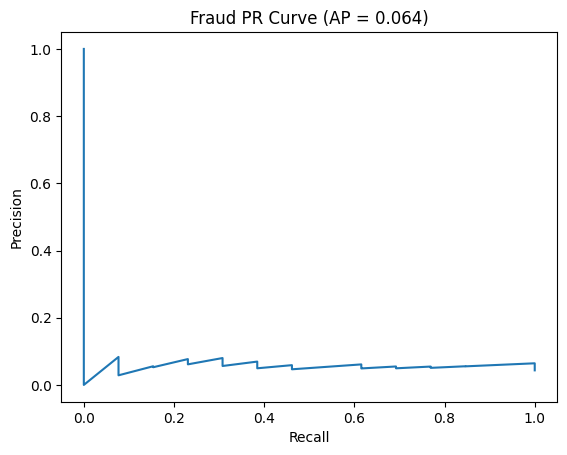

PR-AUC: 0.06372535727132171


In [84]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_prob)
ap = average_precision_score(y_test, y_prob)

plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Fraud PR Curve (AP = {ap:.3f})")
plt.show()
print("PR-AUC:", ap)

In [85]:
import numpy as np
thresholds = np.arange(0.1, 0.9, 0.05)
for t in thresholds:
    preds = (y_prob >= t).astype(int)
    from sklearn.metrics import f1_score
    print(t, f1_score(y_test, preds))

0.1 0.10038610038610038
0.15000000000000002 0.09852216748768473
0.20000000000000004 0.1
0.25000000000000006 0.0916030534351145
0.30000000000000004 0.10526315789473684
0.3500000000000001 0.12698412698412698
0.40000000000000013 0.05405405405405406
0.45000000000000007 0.07142857142857142
0.5000000000000001 0.0
0.5500000000000002 0.0
0.6000000000000002 0.0
0.6500000000000001 0.0
0.7000000000000002 0.0
0.7500000000000002 0.0
0.8000000000000002 0.0
0.8500000000000002 0.0


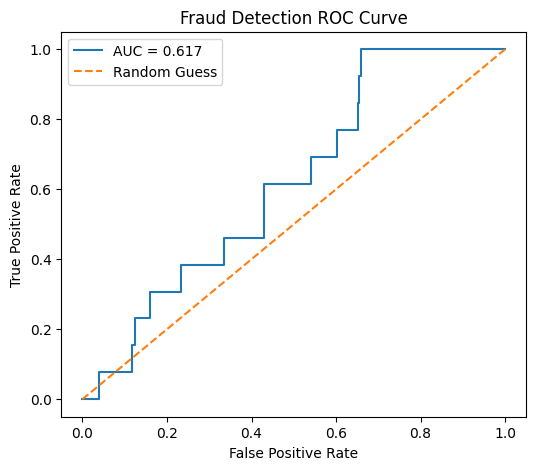

ROC-AUC: 0.6172607879924953


In [86]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],'--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Fraud Detection ROC Curve")
plt.legend()
plt.show()

print("ROC-AUC:", roc_auc)